In [2]:
import pandas as pd
import copy
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('kmean.csv')


In [4]:
df

,X1,X2
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2
5,5.0,3.0
6,4.9,3.1
7,6.7,3.1
8,5.1,3.8
9,6.0,3.0


In [5]:
X=df.to_numpy()


In [6]:
k=3

In [7]:
centroid_old=[[0,0]]*k
centroid=[[6.2,3.2],[6.6,3.7],[6.5,3.0]]

In [8]:
centroid=np.array(centroid)
centroid_old=np.array(centroid_old)

In [9]:
cluster=[0]*len(X)
cluster

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
def euclidean(a,b,ax=1):
    return LA.norm(a-b,axis=ax)

In [11]:
error=euclidean(centroid,centroid_old,None)
print(error)

12.53714481052205


In [12]:
itr=0
while error!=0:
    itr=itr+1
    for i in range((len(X))):
     distances=euclidean(X[i],centroid)
     cluster[i]=np.argmin(distances)
    centroid_old=copy.deepcopy(centroid)

    print("cluster after "+str(itr)+" iteration =")
    print(cluster)
    print("current centroids are ")
    print(centroid)
    

    for p in range(k):
        points=[X[j] for j in range((len(X))) if cluster[j]==p]
        centroid[p]=np.mean(points,axis=0)
    
    error=euclidean(centroid,centroid_old,None)
    print("Error...=",error)

cluster after 1 iteration =
[0, 0, 2, 0, 1, 0, 0, 2, 0, 0]
current centroids are 
[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]
Error...= 1.588639515498743
cluster after 2 iteration =
[2, 0, 2, 0, 1, 0, 0, 2, 1, 2]
current centroids are 
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]
Error...= 0.548478879841925
cluster after 3 iteration =
[2, 0, 2, 0, 1, 0, 0, 2, 1, 2]
current centroids are 
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]
Error...= 0.0


In [13]:
print(cluster)
print(centroid)

[2, 0, 2, 0, 1, 0, 0, 2, 1, 2]
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


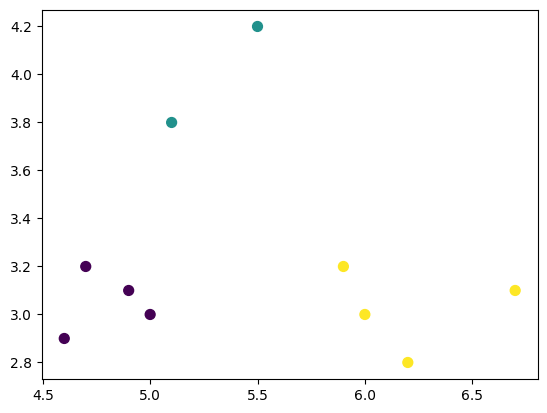

In [14]:

plt.scatter(df['X1'], df['X2'], c=cluster, s=50)